## **i. Mount google drive**
---

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **ii. Import the libraries**
---

In [ ]:
import cv2
import sys
import os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

print("Versions of key libraries")
print("---")
print("cv2:       ", cv2.__version__)
print("numpy:     ", np.__version__)
print("matplotlib:", matplotlib.__version__)


Versions of key libraries
---
cv2:        4.1.2
numpy:      1.19.5
matplotlib: 3.2.2


## **iii. Append /iss/vse/data/ in your python path**
---

In [ ]:
sys.path.append('/content/gdrive/My Drive/iss/vse/data/')
print("All the system paths:")
sys.path

All the system paths:


['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/iss/vse/data/',
 '/content/gdrive/My Drive/iss/vse/data/']

## **iv. Change working directory to /iss/vse/data/**
---

In [ ]:
os.chdir('/content/gdrive/My Drive/iss/vse/data/')
print("Current working directory:")
os.getcwd()

Current working directory:


'/content/gdrive/My Drive/iss/vse/data'

## **v. Define `cv2plt` for image display**
---

In [ ]:
def cv2plt(img):
    plt.figure(figsize=(7,7))        # To change the size of figure
    plt.axis('off')
    if np.size(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img,cmap='gray',vmin=0,vmax=255)  
    plt.show()

print(cv2plt)

<function cv2plt at 0x7fd2db6d8510>


## **Question a**
---
Read in the image 'symbols.jpg' and display the image. Name the image array as `sym`.

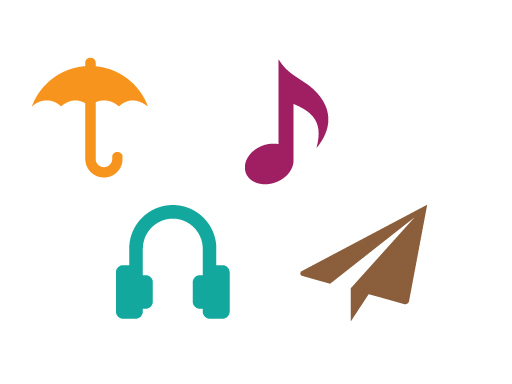

In [ ]:
# Type your code below

sym = cv2.imread('symbols.jpg')
cv2_imshow(sym)

## **Question b**
---
Convert the image to grayscale and display the output. Name the output as `symg`.

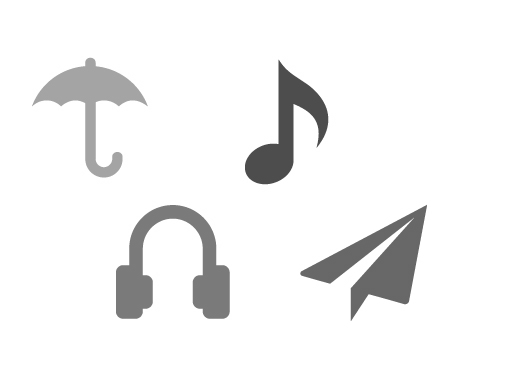

In [ ]:
# Type your code below

symg = cv2.cvtColor(sym,cv2.COLOR_BGR2GRAY)
cv2_imshow(symg)

## **Question c**
---
Perform canny edge detction on `symg` and display the output. Name the output as `symc`

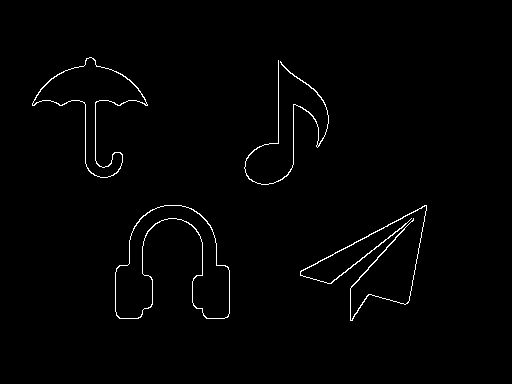

In [ ]:
# Type your code below
symc= cv2.Canny(symg,31,150,apertureSize=3)
cv2_imshow(symc)

## **Question d**
___
Create the below. Name the final output as `symb`. The colour of the boundaries is (191,191,191). Run the code below to see the required output.

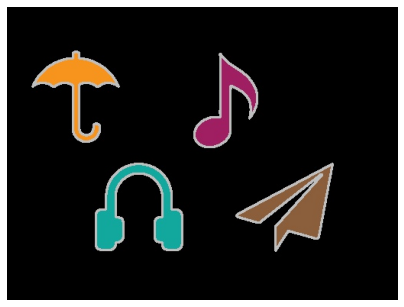

In [ ]:
cv2plt(cv2.imread('wks2_3_d.jpg'))

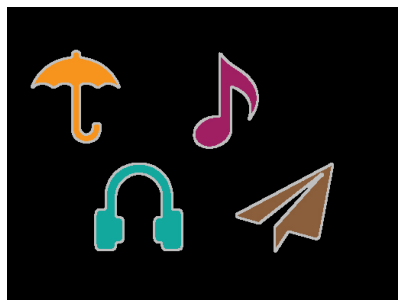

In [ ]:
# Type your code below
#finding boundary contour
ctrs= cv2.findContours(np.uint8(symc), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
ctrs= ctrs[0] 

#creating mask of the image
(_,msk) = cv2.threshold(symg, 200, 255, cv2.THRESH_BINARY_INV)
#cv2_imshow(msk)

#performing isolation
iso = cv2.bitwise_and(sym, sym, mask=np.uint8(msk))
#cv2_imshow(iso)

#drawing contours
symb = cv2.drawContours(iso,ctrs,-1,(191,191,191),2) 
plt.figure(figsize=(7,6))
plt.axis('off')
plt.imshow(cv2.cvtColor(symb,cv2.COLOR_BGR2RGB))                                             

## **Question e**
---
Create the below output. Name the final output as `symhv`. Run the code below to see the required output.

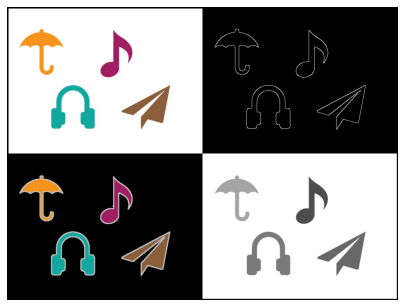

In [ ]:
cv2plt(cv2.imread('wks2_3_e.jpg'))

In [ ]:
#sym.shape
#symc.shape
#symb.shape
#symg.shape

symc = cv2.cvtColor(symc,cv2.COLOR_GRAY2BGR)
symg = cv2.cvtColor(symg,cv2.COLOR_GRAY2BGR)
symc.shape
symg.shape

(384, 512, 3)

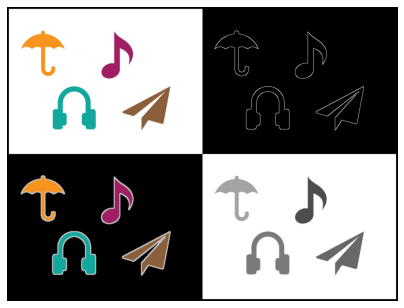

In [ ]:
# Type your code below

row1 = cv2.hconcat((sym, symc))
row2 = cv2.hconcat((symb, symg))
image = cv2.vconcat((row1,row2))

#making border
image = cv2.copyMakeBorder(image, 5, 5, 5, 5, cv2.BORDER_CONSTANT) 
plt.figure(figsize=(7,6))
plt.axis('off')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))